# Welcome to the Machine learning for IDE students application!

This is a JupyterNotebook created for IDE students to get started with machine learning for product analysation. This might be a lot at first and you might not have any programming background. If you follow the steps and read the explanation you should be able to use our machine-learning application. 

## Application

This application will take you through the steps needed to be taken to analyse product usage using machine learning. It will not cover the data gathering, but we created a **different document** that shows how to collect data for your model and prepare it for usage in this program.

In this program, we will follow a certain number of steps. We will briefly go over them so you understand the basics and further on we will explain them more:

**The main flow of the program**

 1. Preprocessing, preparing the data and making it ready for usage in the program. This step extracts the information(features) from the data that you've gathered, because the data is not quite usable in its raw state.
 2. Active learning, the training part of the program. This part classifies the data you have gathered, but it needs your help. It will show you the video that you have made of the activity performed with the product and asks you to classify the action. This is why it is needed to video-capture the activities. It will update its model every time and that way it learns actively.
 3. Usage after training, the part where you can gather the actual data about product usage. You have trained the model in the active learning step, now you can see the product usage. The model sees what action is performed and will see if something is being done that is not in the trained model, novelty detection.

## key terms
**Class** There are multiple classes for each model, a class is the "bucket" in which a datapoint belongs. You can see it as how it is classified.
**Model**: A machine learning model that can predict in what class a datapoint belongs
**Datapoint**: One point of data, the model sees this as one thing that enters the model.
**Features** Features belong to a datapoint. A datapoint has multiple features most of the time.


## Pre-processing
The data you have gathered are accelerometer data and gyroscope data, if you do not know what these are, please consolidate this [video](https://www.youtube.com/watch?v=vFUlaRmuEHk&ab_channel=SymmetryElectronics).
This data is used to train the model to detect that action is performed with the product, but this data is messy and can not be understood by the model as well. To get an understanding of this data.

![accelerometer and gyroscope data explanation](https://www.researchgate.net/publication/335978678/figure/fig1/AS:806271687073792@1569241558268/Example-of-accelerometer-and-gyroscope-data-Data-from-several-activities-is.ppm)
This looks like our data, but our data is not in a graph, but looks like **insert image of actual data**

![enter image description here](https://www.electronicwings.com/storage/PlatformSection/TopicContent/311/description/Arduino_Output_window.png)

As you might understand this is not readable that easily even for a machine, however when we do some calculations on this data we get new features about the data points. 

### The actual pre-processing
To get an understanding of what happens. You need to know that we divide the data into frames, this way we can get a better sense of the data and be more certain of our prediction, because we use more raw data, moreover it makes the model faster. 

![enter image description here](https://www.researchgate.net/publication/346142883/figure/fig2/AS:961234023231491@1606187458853/Framing-raw-sensor-data-as-12-input-to-CNN-trained-to-predict-the-local-displacement-x.ppm)
This shows how the data is framed and processed. 
We extract features from the frame like:
*Note that this is per direction for the accelerometer and per axis for the gyroscope*

 - Average
 - Maximum
 - Minimum
 - Standard deviation
 - Most present frequency

### Fourier Transform
The last element of the feature list needs some extra explanation. We use a Fourier transformer to get more information on the frequencies that are in the data signal.
most signals are composed in multiple frequencies like sound waves for example. A Fourier transformer can distinguish all these frequencies and then we can process all frequencies independently. It looks something like this:
![enter image description here](https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png)

## Lets Start
There are 4 variables that are important for you to edit.

 - Frame size: The size of the frame used for the feature extraction, set larger for slow movements. Smaller for very quick movements. Standard = 2 sec.
 - Frame offset: The amount of offset per frame, can be increased is the window size is set bigger. 
 - start-chop 
 - end-chop




## Active learning

If you have set up all your files and variables correctly this step should be quite easy. If all is right the application will show you a part of the video you have recorded with the question to label it according to the action performed on screen. If you need a new label because the correct option is not one of the options, you can add that. 


## Congratulations

You have just trained a machine-learning model! The model is now trained to use for analysation of product usage. The model will predict the class that the movement of the real- world data is and can detect if something strange is happening. This will help you to create a better product.


## Get you real world data

In this step, you can insert your real-world data into the model. 
If there are any novelties they will show in the result.


## Get all the packages
To be able to run the application we need to import packages. 
These packages were mostly written by us and contain the main functions of the program, so this program does not look like a whole bunch of code. 
Packages are python code that can be imported, this way your code stays clean because the majority of the code is not in the current file, but in another.

In [1]:
from Data_Gathering_and_Preprocessing.data_processing import Preprocessing, empty_files
from Model_Active_Learning.active_learning import ActiveLearning

In [2]:
Activity = 'Walking3'

In [3]:
empty_files([f'Preprocessed-data/{Activity}/features_{Activity}.txt',
             f'Preprocessed-data/{Activity}/features_{Activity}_scaled.csv',
             f'Preprocessed-data/{Activity}/processed_data_files.txt'])

pre = Preprocessing(Activity)
pre.windowing([r"Data/data-lopen/Walking_part_1.csv", r"Data/data-lopen/Walking_part_1_gyro.csv"], r"Data/data-lopen/Walking_part_1.mp4",
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=False)
pre.windowing([r"Data/data-lopen/Walking_part_2.csv", r"Data/data-lopen/Walking_part_2_gyro.csv"], r"Data/data-lopen/Walking_part_2.mp4",
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=True)

200.0 100.0 201 101
['2.885', '3.089', '3.293', '3.497']
['3.089', '3.293', '3.497', '3.701']
['3.293', '3.497', '3.701', '3.905']
['3.497', '3.701', '3.905', '4.11']
['3.701', '3.905', '4.11', '4.315']
['3.905', '4.11', '4.315', '4.52']
['4.11', '4.315', '4.52', '4.725']
['4.315', '4.52', '4.725', '4.93']
['4.52', '4.725', '4.93', '5.134']
['4.725', '4.93', '5.134', '5.338']
['4.93', '5.134', '5.338', '5.542']
['5.134', '5.338', '5.542', '5.746']
['5.338', '5.542', '5.746', '5.95']
['5.542', '5.746', '5.95', '6.155']
['5.746', '5.95', '6.155', '6.36']
['5.95', '6.155', '6.36', '6.565']
['6.155', '6.36', '6.565', '6.77']
['6.36', '6.565', '6.77', '6.975']
['6.565', '6.77', '6.975', '7.18']
['6.77', '6.975', '7.18', '7.385']
['6.975', '7.18', '7.385', '7.59']
['7.18', '7.385', '7.59', '7.795']
['7.385', '7.59', '7.795', '8.0']
['7.59', '7.795', '8.0', '8.202']
['7.795', '8.0', '8.202', '8.405']
['8.0', '8.202', '8.405', '8.608']
['8.202', '8.405', '8.608', '8.811']
['8.405', '8.608', '8

## Active learning

If you have set up all your files and variables correctly this step should be quite easy. If all is right the application will show you a part of the video you have recorded with the question to label it according to the action performed on screen. 

Here you can enter the number of activities that you think will be in the video. If there are more than you antivipated in the first place, no problem, you can add them later. 
This is also the step where you train the model, take your time and label the data correctly, else, this will result in a bad model. There is also the option to delete a certain datapoint if you are not sure about something or if it is a faulty one. 

18.674 1


[0.0, 0.06, 0.47, 0.47]
Enter the index or the name of one of the following labels. Enter 'n' to add a new label:
1. walking
2. running
3. stairs_up
4. stairs_down


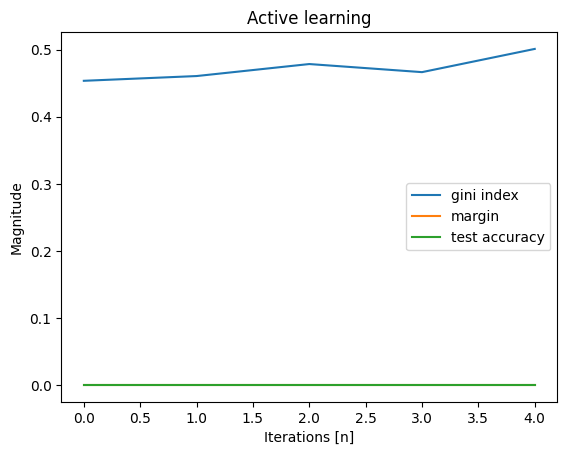

In [3]:
labels = ['walking', 'running', 'stairs_up', 'stairs_down']
# vid = VideoLabeler(labels)
# vid.labeling

AL = ActiveLearning(fr'Preprocessed-data/{Activity}/features_{Activity}_scaled.csv', Activity, labels, 1)
AL.training(5)
AL.plotting()
AL.write_to_file()

In [4]:
AL.testing(10)

25.831 1


Enter the index or the name of one of the following labels. Enter 'n' to add a new label:
1. walking
2. running
3. stairs_up
4. stairs_down


KeyboardInterrupt: Interrupted by user


## Congratulations

You have just trained a machine-learning model! The model is now trained to use for analysation of product usage. The model will predict the class that the movement of the real- world data is and can detect if something strange is happening. This will help you to create a better product.


## Get you real world data

In this step, you can insert your real-world data into the model. 
If there are any novelties they will show in the result.